In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data=pd.read_excel(r'C:\Users\user\Desktop\GB Data Science\Predictive Modeling\Assignment 1\Crime_In_Cities.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [14]:
data.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


Checking for NAN values

In [5]:
#Checking for NAN values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

Note: There is no NAN values

Summary and shapes of data

In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,616.180000,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,573.739175,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,230.750000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,454.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,822.500000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,3545.000000,86.000000,81.000000,34.000000,81.000000,36.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
X1    50 non-null int64
X2    50 non-null int64
X3    50 non-null int64
X4    50 non-null int64
X5    50 non-null int64
X6    50 non-null int64
X7    50 non-null int64
dtypes: int64(7)
memory usage: 2.8 KB


In [8]:
print(data.shape)
print(data.corr(method = 'pearson').shape)

(50, 7)
(7, 7)


2 types of Matplotlib plots

1. Check the correlation between X1 and X4

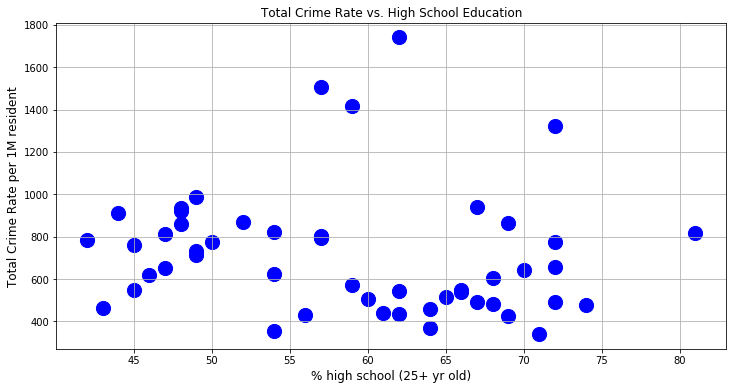

In [15]:
plt.subplots(figsize=(12,6))
plt.scatter(data['X4'], data['X1'],marker='o', s=200, color='blue')
plt.xlabel('% high school (25+ yr old)', fontsize=12)
plt.ylabel('Total Crime Rate per 1M resident', fontsize=12)
plt.title('Total Crime Rate vs. High School Education')
plt.grid(True)

Matrix plot showing correlaton among the variables

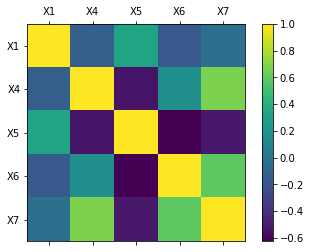

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Only includes output variables (X1) and input variables related to education 
cax = ax.matshow(data[['X1','X4','X5','X6','X7']].corr(method='pearson'))
fig.colorbar(cax) 
var=['X1','X4','X5','X6','X7']
xpos=np.arange(len(var))
plt.xticks(xpos,var)
plt.yticks(xpos,var)
plt.show()

4. & 5. Split the data into training and testing data, and train a linear regression model with training data

In [38]:
#Input variables by including education variables only
x=data[['X4','X5','X6','X7']]

#Output variables
y=data['X1']

In [39]:
from sklearn.model_selection import train_test_split
# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
#Checking the values all the coefficients
all_theta=model.coef_

In [41]:
#Displaying all the coefficients
for i in all_theta:
    print (i)

-14.425845666862102
-0.9567498250311139
-5.9969379659592725
24.96326957980352


In [42]:
#Showing the values of the intercepts and all the coefficients
theta_0 = model.intercept_ 
theta_1 = model.coef_[0]
theta_2 = model.coef_[1]
theta_3 = model.coef_[2]
theta_4 = model.coef_[3]

In [43]:
#Print out the linear equation
print(' y = {0} + x1 * {1} + x2 * {2} + x3 * {3} + x4 * {4}'.format(theta_0, theta_1,theta_2,theta_3,theta_4))

 y = 1399.5911280835426 + x1 * -14.425845666862102 + x2 * -0.9567498250311139 + x3 * -5.9969379659592725 + x4 * 24.96326957980352


In [44]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("train_score", train_score)
print("test_score", test_score)

train_score 0.1867763402749033
test_score -0.12532704372328385


6. & 7. Test trained model and display performance with Mean Squared Error

In [49]:
#Predictions with testing data
y_test_predict=model.predict(x_test)

In [50]:
y_test_predict

array([696.91002523, 843.86763985, 750.6443609 , 732.77730009,
       676.02174037, 689.21051053, 649.33998771, 823.83485098,
       795.15428954, 713.55921333, 778.14411213, 745.79962422,
       769.80614398])

In [51]:
from sklearn.metrics import mean_squared_error
import math

In [52]:
# Test mean square error
mse_test = mean_squared_error(y_test_predict, y_test)
print("\nmse_test", mse_test)
print("sqrt_mse_test", math.sqrt(mse_test))


mse_test 153931.8216259321
sqrt_mse_test 392.34146049829104
